# Practice Activity 8.1: kNN & Decision Trees

Elizabeth Berry

GSB 544-01

11/17/23

## Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from plotnine import *

In [19]:
from palmerpenguins import load_penguins

penguins = load_penguins()
penguins = penguins.dropna()

In [20]:
X = penguins.drop('bill_depth_mm', axis=1)
y = penguins['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

In [21]:
# Preprocessing
ct = ColumnTransformer(
        [
            ("dummify", OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
             make_column_selector(dtype_include=object)),
            ("standardize", StandardScaler(),
             make_column_selector(dtype_include=np.number))
        ],
        remainder="passthrough"
    )

In [22]:
# LASSO pipeline
lasso_pipeline = Pipeline([
    ("preprocessing", ct),
    ("lasso_regression", Lasso(alpha=0.001))  # Set alpha directly to 0.001
])

# Fit the LASSO model
lasso_pipeline.fit(X_train, y_train)

# Training error for LASSO
y_train_pred_lasso = lasso_pipeline.predict(X_train)
training_error_lasso = mean_squared_error(y_train, y_train_pred_lasso)

# Testing error for LASSO
y_test_pred_lasso = lasso_pipeline.predict(X_test)
testing_error_lasso = mean_squared_error(y_test, y_test_pred_lasso)

# Store errors
lasso_training_errors = [training_error_lasso]
lasso_testing_errors = [testing_error_lasso]

print(f"Training Error (LASSO): {training_error_lasso}")
print(f"Testing Error (LASSO): {testing_error_lasso}")

Training Error (LASSO): 0.5291932782877884
Testing Error (LASSO): 0.8990403698963558


/Users/elleberry/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.510e-01, tolerance: 1.027e-01


In [23]:
# kNN models
k_values = [3, 5]  # Choose different values of K
knn_training_errors = []
knn_testing_errors = []

for k in k_values:
    # kNN pipeline
    knn_pipeline = Pipeline([
        ("preprocessing", ct),
        ("knn_regression", KNeighborsRegressor(n_neighbors=k))
    ])

    # Fit the kNN model
    knn_pipeline.fit(X_train, y_train)

    # Training error for kNN
    y_train_pred_knn = knn_pipeline.predict(X_train)
    training_error_knn = mean_squared_error(y_train, y_train_pred_knn)

    # Testing error for kNN
    y_test_pred_knn = knn_pipeline.predict(X_test)
    testing_error_knn = mean_squared_error(y_test, y_test_pred_knn)

    # Store errors for kNN
    knn_training_errors.append(training_error_knn)
    knn_testing_errors.append(testing_error_knn)

    print(f"Training Error (kNN, K={k}): {training_error_knn}")
    print(f"Testing Error (kNN, K={k}): {testing_error_knn}")

Training Error (kNN, K=3): 0.32802422723475344
Testing Error (kNN, K=3): 0.9250082918739634
Training Error (kNN, K=5): 0.39382406015037585
Testing Error (kNN, K=5): 0.9268358208955224


In [24]:
# Decision Tree model
dt_pipeline = Pipeline([
    ("preprocessing", ct),
    ("decision_tree_regression", DecisionTreeRegressor())
])

# Fit the decision tree model
dt_pipeline.fit(X_train, y_train)

# Training error for Decision Tree
y_train_pred_dt = dt_pipeline.predict(X_train)
training_error_dt = mean_squared_error(y_train, y_train_pred_dt)

# Testing error for Decision Tree
y_test_pred_dt = dt_pipeline.predict(X_test)
testing_error_dt = mean_squared_error(y_test, y_test_pred_dt)

# Store errors for Decision Tree
dt_training_errors = [training_error_dt]
dt_testing_errors = [testing_error_dt]

print(f"Training Error (Decision Tree): {training_error_dt}")
print(f"Testing Error (Decision Tree): {testing_error_dt}")

Training Error (Decision Tree): 0.0
Testing Error (Decision Tree): 1.4098507462686571


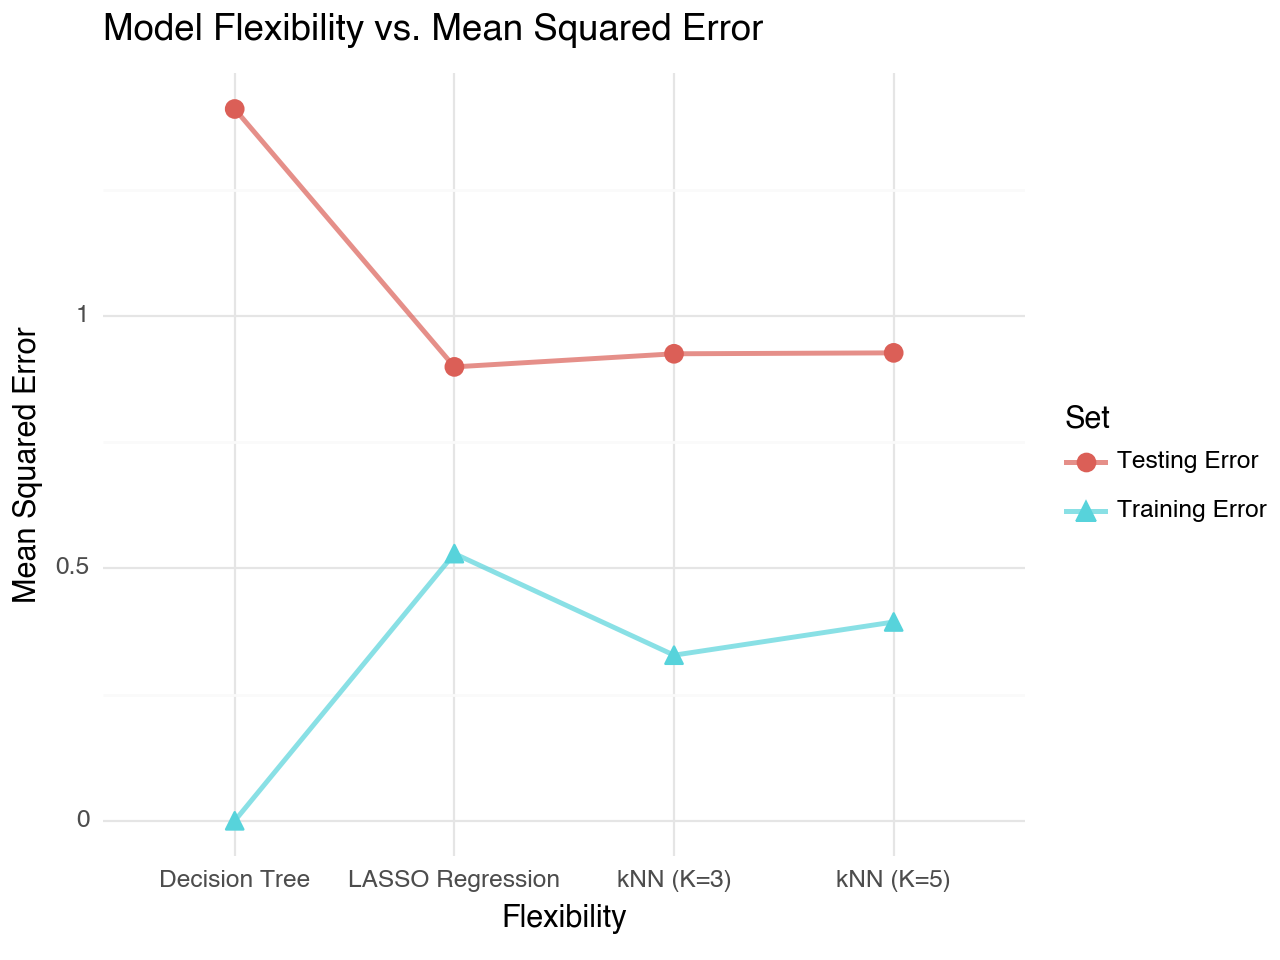

In [32]:
from plotnine import ggplot, aes, geom_line, geom_point, labs, theme_minimal

# Data for the plot
flexibility_values = ['LASSO Regression', 'kNN (K=3)', 'kNN (K=5)', 'Decision Tree']
training_errors = [lasso_training_error, knn_training_error_3, knn_training_error_5, dt_training_error]
testing_errors = [lasso_testing_error, knn_testing_error_3, knn_testing_error_5, dt_testing_error]

# Create a DataFrame for the plot
plot_data = pd.DataFrame({
    'Model': flexibility_values * 2,
    'Error': training_errors + testing_errors,
    'Set': ['Training Error'] * len(flexibility_values) + ['Testing Error'] * len(flexibility_values)
})

# Plotting with ggplot
p = (
    ggplot(plot_data, aes(x='Model', y='Error', color='Set', shape='Set', group='Set')) +
    geom_line(size=1, alpha=0.7) +
    geom_point(size=3) +
    labs(title='Model Flexibility vs. Mean Squared Error', x='Flexibility', y='Mean Squared Error') +
    theme_minimal()
)

# Show the plot
print(p)

Based on the Mean Sqared Error, it looks like k Nearest Neighbors with k = 5 is the best option for modeling the data to predict bill depth because the difference in mean square error is very low and there is a small distance between the testing error and the training error.